# Choosing our system

We first looked at "Regular pattern formation in real ecosystems" (Max Rietkerk and Johan van de Koppel, Trends in Ecology and Evolution Vol.23 No.3, 169-175 doi:10.1016/j.tree.2007.10.013). The main theoretical model developed in the paper is:

> We reviewed studies from a wide range of ecosystems in which scale-dependent feedback is proposed to explain regular pattern formation. The mechanisms involved all correspond to Turing’s scale-dependent activator–inhibitor principle and only differ in the details.

The class was most interested in two models:

1. Savanna models (Figure 2C)
2. Ribbon forests (Figure 2F)

Our plan is to develop a model of Turing's scale-dependent activator-inhibitor principle, and match up to the above models.

# How does the activator-inhibitor model work?

As we discovered, this is a specific case of a reaction-diffusion equation, which takes the general form

$$\partial_t\vec{q} = \boldsymbol{D}+\nabla^2\vec{q} + \boldsymbol{R}(\vec{q})$$

but how does this come up physically? 

## Laplacian as averaging operator

... so, if looking at steady state, expect Poisson's equation

$$\frac{\partial^2 u}{\partial x^2} = 0 $$

If we allow the substance to move over time, we get a diffusion equation

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

for a one-component system, where $D$ is the diffusion constant. For a two-component system, we'd expect something like the following if nobody can interact with each other:

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2}$$
$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2}$$

That is, an uncoupled system of equations. Fair enough. Now, what if we have some interaction? These sorts of equations come up when you have two reactions. Here, we'll be slightly more specific and say we have two (chemical or biological) species $U$ and $V$ whose concentrations are given by $u$ and $v$.

Let's go ahead and simulate that. This is done with standard numerical techniques, but I was heavily influenced by Cyrille Rosant's [notebook](http://nbviewer.ipython.org/github/ipython-books/cookbook-code/blob/master/notebooks/chapter12_deterministic/04_turing.ipynb). Buy his [cookbook](http://cyrille.rossant.net/ipython-cookbook-released/)!

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The physical parameters

In [37]:
Du = 2.2
Dv = 6

The simulation parameters. We'll use the following condition to ensure that we're stable (see Lorena Barba)

$$ dt \le \frac{dx^2}{2} $$

In [38]:
size = 20 #size of 2D grid
dx = 2/size # space step
dt = .9 * dx**2/2 # see stability condition above
T = 40000*dt # might want to specify time directly
n = int(T/dt) # number of steps

In [39]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [40]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright) / 4*dx**2


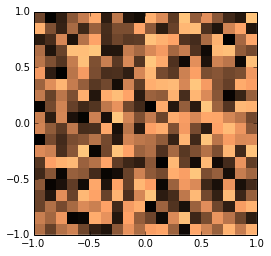

In [41]:
plt.imshow(U, cmap=plt.cm.copper, interpolation='none',extent=[-1,1,-1,1]);

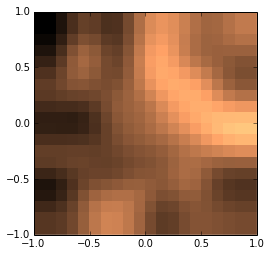

In [43]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * Du * deltaU, \
        Vc + dt * Dv * deltaV
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
plt.imshow(U, cmap=plt.cm.copper,  interpolation='none', extent=[-1,1,-1,1]);

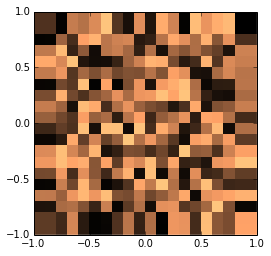

In [30]:
plt.imshow(U, cmap=plt.cm.copper,  interpolation='none', extent=[-1,1,-1,1]);

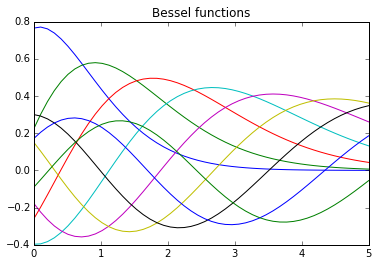

In [15]:
from IPython.display import display, clear_output
from scipy.special import jn
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()


In [ ]:
# We simulate the PDE with the finite difference method.
U = np.random.rand(size, size)
V = np.random.rand(size, size)
f,ax = plt.subplots()
for i in range(10):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * Du * deltaU, \
        Vc + dt * Dv * deltaV + Uc - Vc
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
    clear_output(wait=True)
    plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1])
    display(f)
plt.close()